In [20]:
from sklearn import preprocessing
from sklearn import tree

In [21]:
#Predictor variables
Outlook = ['Rainy', 'Rainy', 'Overcast', 'Sunny', 'Sunny', 'Sunny','Overcast','Rainy', 'Rainy', 'Sunny', 'Rainy','Overcast', 'Overcast','Sunny']

Temperature = ['Hot', 'Hot', 'Hot', 'Mild', 'Cool', 'Cool', 'Cool','Mild', 'Cool', 'Mild', 'Mild', 'Mild', 'Hot', 'Mild']

Humidity = ['High', 'High', 'High', 'High', 'Normal', 'Normal', 'Normal','High', 'Normal', 'Normal', 'Normal', 'High', 'Normal','High']

Wind = ['False', 'True', 'False', 'False', 'False', 'True', 'True','False', 'False', 'False', 'True', 'True', 'False', 'True']

#Class Label:
Play = ['No', 'No', 'Yes', 'Yes', 'Yes', 'No', 'Yes', 'No',
'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'No']

In [22]:
le = preprocessing.LabelEncoder()
# Converting string labels into numbers.

Outlook_encoded = le.fit_transform(Outlook)
Outlook_name_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
print("Outllok mapping:",Outlook_name_mapping)

Temperature_encoded = le.fit_transform(Temperature)
Temperature_name_mapping = dict(zip(le.classes_, le.transform(le.classes_)))

print("Temperature mapping:",Temperature_name_mapping)

Humidity_encoded = le.fit_transform(Humidity)
Humidity_name_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
print("Humidity mapping:",Humidity_name_mapping)
Wind_encoded = le.fit_transform(Wind)
Wind_name_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
print("Wind mapping:",Wind_name_mapping)
Play_encoded = le.fit_transform(Play)
Play_name_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
print("Play mapping:",Play_name_mapping)
print("\n\n")
print("Weather:" ,Outlook_encoded)
print("Temerature:" ,Temperature_encoded)
print("Humidity:" ,Humidity_encoded)
print("Wind:" ,Wind_encoded)
print("Play:" ,Play_encoded)

Outllok mapping: {'Overcast': 0, 'Rainy': 1, 'Sunny': 2}
Temperature mapping: {'Cool': 0, 'Hot': 1, 'Mild': 2}
Humidity mapping: {'High': 0, 'Normal': 1}
Wind mapping: {'False': 0, 'True': 1}
Play mapping: {'No': 0, 'Yes': 1}



Weather: [1 1 0 2 2 2 0 1 1 2 1 0 0 2]
Temerature: [1 1 1 2 0 0 0 2 0 2 2 2 1 2]
Humidity: [0 0 0 0 1 1 1 0 1 1 1 0 1 0]
Wind: [0 1 0 0 0 1 1 0 0 0 1 1 0 1]
Play: [0 0 1 1 1 0 1 0 1 1 1 1 1 0]


In [23]:
import numpy as np
import torch
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.tree import export_graphviz
from six import StringIO  
from IPython.display import Image  
import pydotplus
output = []
inputs = []
for i in range(len(Play_encoded)):
  temp = [Outlook_encoded[i], Temperature_encoded[i], Humidity_encoded[i], Wind_encoded[i]]
  output.append(Play_encoded[i])
  inputs.append(temp)
inputs=np.array(inputs)
inputs,output

(array([[1, 1, 0, 0],
        [1, 1, 0, 1],
        [0, 1, 0, 0],
        [2, 2, 0, 0],
        [2, 0, 1, 0],
        [2, 0, 1, 1],
        [0, 0, 1, 1],
        [1, 2, 0, 0],
        [1, 0, 1, 0],
        [2, 2, 1, 0],
        [1, 2, 1, 1],
        [0, 2, 0, 1],
        [0, 1, 1, 0],
        [2, 2, 0, 1]]), [0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0])

In [24]:
data_feature_names = ['Outlook','Temperature','Humidity', 'Wind']
X_train, X_test, y_train, y_test = train_test_split(inputs, output, train_size = 0.9)
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print("R",metrics.recall_score(y_test,y_pred))
print("A",metrics.accuracy_score(y_test, y_pred))
print("P",metrics.precision_score(y_test,y_pred))
print("F1",metrics.f1_score(y_test,y_pred))

R 0.0
A 0.5
P 0.0
F1 0.0


/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


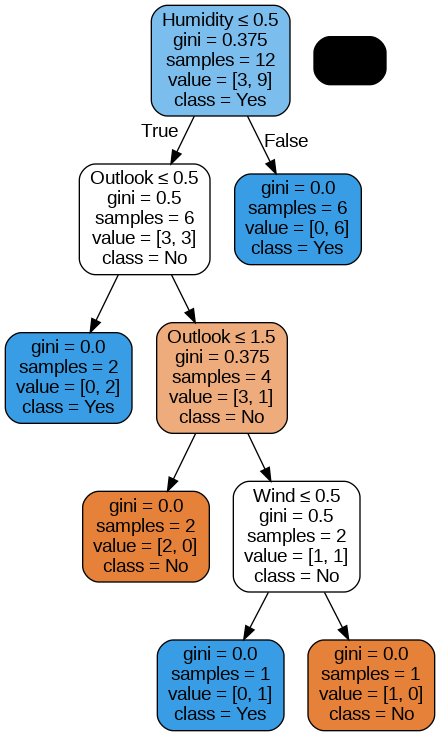

In [25]:
dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = ['Outlook','Temperature','Humidity', 'Wind'],class_names=['No','Yes'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('weather.png')
Image(graph.create_png())

In [26]:
prediction = clf.predict([[1,2,1,0],[2,0,0,1]])
print("Outlook=rainy, Temperature=mild, Humidity=normal,Wind=false ", prediction[0] and 'Yes\n' or 'No\n')
print("Outlook=sunny, Temeprature=cool, Humidity=high,Wind=true", prediction[1] and 'Yes' or 'No')

Outlook=rainy, Temperature=mild, Humidity=normal,Wind=false  Yes

Outlook=sunny, Temeprature=cool, Humidity=high,Wind=true No


In [27]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.tree import export_graphviz
from six import StringIO  
from IPython.display import Image  
import pydotplus
iris= load_iris()
x = iris.data
y = iris.target
x,y

(array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
        [5

In [28]:
data_feature_names = iris.feature_names
X_train, X_test, y_train, y_test = train_test_split(x, y, train_size = 0.6)
clf = tree.DecisionTreeClassifier() # max_depth=3, random_state=34
clf = clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print("A ",metrics.accuracy_score(y_test, y_pred))
print("P ",metrics.precision_score(y_test,y_pred,average='micro'))
print("R ",metrics.recall_score(y_test,y_pred,average='micro'))
print("F1 ",metrics.f1_score(y_test,y_pred,average='micro'))

A  0.9833333333333333
P  0.9833333333333333
R  0.9833333333333333
F1  0.9833333333333333


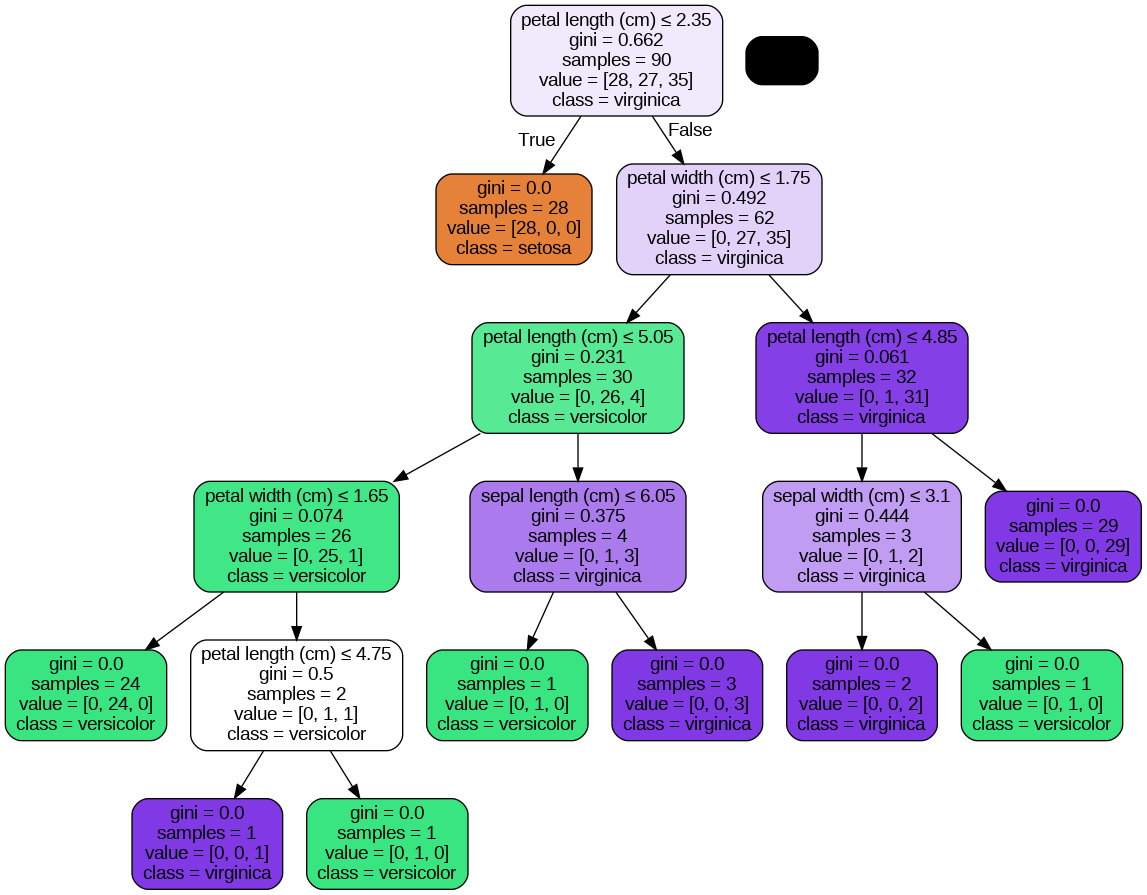

In [29]:
dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = data_feature_names,class_names=['setosa','versicolor','virginica'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('iris.png')
Image(graph.create_png())